<a href="https://colab.research.google.com/github/andrejdamasek/MSAP/blob/main/lv2_rjesenje_andrej_damasek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('/content/sample_data/hormon.csv',sep=';', decimal=',').convert_dtypes()

print(data.head())
print(data.info())
print(data.describe())

print(data.isnull().sum())
data['gastrS']=data['gastrS'].fillna(data['gastrS'].median())
data['somatS']=data['somatS'].fillna(data['somatS'].median())
data['somatZ']=data['somatZ'].fillna(data['somatZ'].median())
print(data.count())




  spol  gastrS  somatS  somatZ  pusenje  alkohol  kava  CLOtest dijagnoza,,,
0    z    92.3     3.1   29.31        1        0     1        1            G
1    z    49.5     8.5    5.52        0        0     1        1            G
2    z    40.5    16.2   15.22        1        0     1        0            G
3    z    42.7    16.0    3.67        0        0     1        0           G,
4    z    48.2    16.0   66.97        1        0     1        0           G,
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spol          82 non-null     string 
 1   gastrS        78 non-null     Float64
 2   somatS        77 non-null     Float64
 3   somatZ        81 non-null     Float64
 4   pusenje       82 non-null     Int64  
 5   alkohol       82 non-null     Int64  
 6   kava          82 non-null     Int64  
 7   CLOtest       82 non-null     Int64  
 8   d

 KORAK 1:
 Postoje 3 float varijable, 4 int varijable i 2 string varijable. Za varijable gastrS, somatS i somatZ nedostaju neke vrijednosti, a ostalih vrijednosti ima sveukupno 82. Za nedostajuće vrijednosti dodali smo medijan tih varijabli, te svih varijabli sada postoji 82.

count         82.0
mean     52.395244
std      17.324568
min          16.23
25%           42.0
50%          48.55
75%        56.0225
max          140.3
Name: gastrS, dtype: Float64
skew  2.2429778753364262
kurtosis 7.961725322695685
std: 17.218606231349497


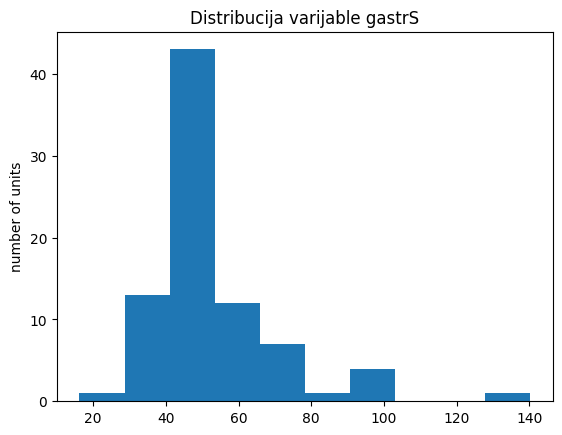

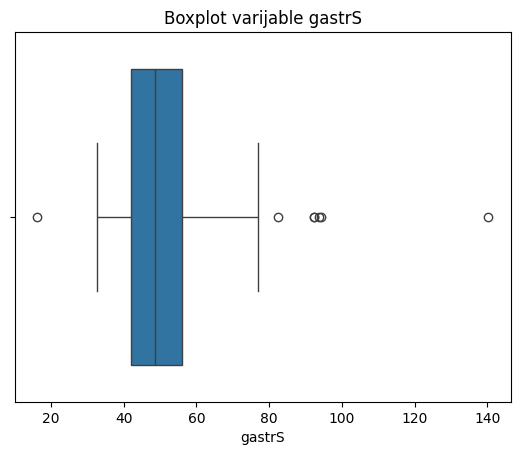

In [ ]:
import seaborn as sns
print(data['gastrS'].describe())
print('skew ',data['gastrS'].skew())
print('kurtosis', data['gastrS'].kurtosis())
standardna_devijacija=np.std(data['gastrS'],ddof=0)
print('std:' ,standardna_devijacija)

plt.hist(data['gastrS'])
plt.ylabel('number of units')
plt.title('Distribucija varijable gastrS')
plt.show()

sns.boxplot(x=data['gastrS'])
plt.title('Boxplot varijable gastrS')
plt.show()


KORAK 2:
'gastrS'

count         82.0
mean     52.395244
std      17.324568
min          16.23
25%           42.0
50%          48.55
75%        56.0225
max          140.3

Maksimalna vrijednost je 140.3, a medijalan vrijednosti 52.395244, a standardna devijacija je 17.218606231349497

Vrijednost za 'gastrS' skew  2.2429778753364262 što znači da je pozitivna asimetrija (pomaknuto u lijevo, što također možemo vidjeti na histogramu),
kurtosis 7.961725322695685 što znači da je spljoštenost leptokurtičnost  (krivulja izgleda “visoka i vitka”).

Sa boxplota vidimo da postoje outlieri, više outliera ima koji su veći od maksimalne vrijednosti (5) i imamo jedan outlier koji je manji od minimuma.

In [ ]:
from scipy.stats import shapiro
data['gastrS']=data['gastrS'].fillna(data['gastrS'].mean())
stat, p_value = shapiro(data['gastrS'])
print(f"Shapiro-Wilk statistika: {stat}, P-vrijednost: {p_value}")
if p_value>0.05:
  print('Distribucija je normalna')
else:
  print('Distribucija nije normalna')

n=data['gastrS'].count()
razina_pouzdanosti=0.99
alfa = 1 - razina_pouzdanosti
t_vrijednost = stats.t.ppf(1 - alfa / 2, df=n-1) # Kritična vrijednost t-distribucije za zadani stupanj slobode
# Izračun margine pogreške
margina_pogreske = t_vrijednost * (standardna_devijacija / np.sqrt(n-1))
# Interval povjerenja
srednja_vrijednost=data['gastrS'].mean()
donja_granica = srednja_vrijednost - margina_pogreske
gornja_granica = srednja_vrijednost + margina_pogreske
print(f"99% interval povjerenja: ({donja_granica:.2f},{gornja_granica:.2f})")


Shapiro-Wilk statistika: 0.7976637579529138, P-vrijednost: 2.989021771073396e-09
Distribucija nije normalna
99% interval povjerenja: (47.35,57.44)


KORAK 3:


Koristimo t-test, koristi se neparametarska metoda. Pomoću Shapiro-Wilk testa dokazali smo da je p-vrijednost manja od 0.05 (2.989021771073396e-09) što znaći da distribucija podataka nije normalno distribuirana. S pouzdanosti od 99% možemo tvrditi da se prosječna vrijednost za varijablu 'gastrS' nalazi u intervalu od 47.35 do 57.44.

stat:  3.9201585881818457
P:  0.047710379340530996
Spol i pusenje su povezane


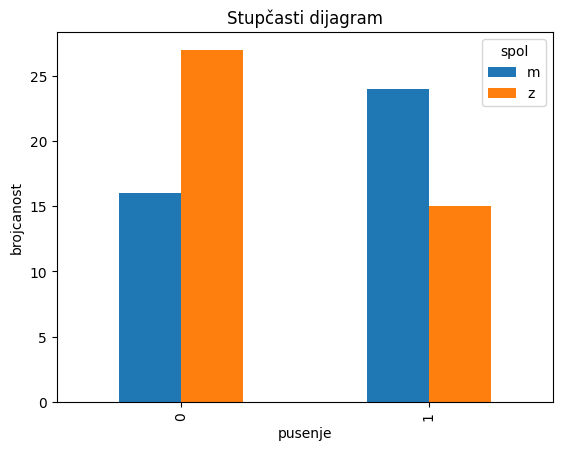

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
ct_spol=pd.crosstab(data['pusenje'],data['spol'])
chi2_stat, p_val_chi2, dof, expected = chi2_contingency(ct_spol)
print('stat: ',chi2_stat)
print('P: ',p_val_chi2)

if p_val_chi2<0.05:
  print('Spol i pusenje su povezane')
else:
  print('Spol i pusenje nisu povezane')

ct_spol.plot(kind='bar')
plt.title('Stupčasti dijagram')
plt.xlabel('pusenje')
plt.ylabel('brojcanost')
plt.show()

Vrijednosti p_val_chi2 je 0.0477 što znači da postoji statistička značajnost da postoji povezanost između spola i pušenja.  Iz stupčastog dijagrama vidimo da većina muškaraca puši dok, većina žena ne puši.

ZAKLJUČAK:

1. Za testiranje normalnosti distribucije podataka koristili smo Shapiro-Wilk test iz kojeg smo saznali da distribucija nije normalna pošto je p vrijednost bila manja od 0.05 ( 2.989021771073396e-09).

2. Za usporedbu skupina koristio sam t-test jer nemamo normalu distribuciju podataka.


3. Za interval povjerenja od 99% dobili smo vrijednosti (47.35,57.44), što znači da smo mi sa 99% sigurni da se srednja vrijednost nalazi u tom intervalu.


4. Postoj statistička značajnost između spola i pušenja gdje smo iz stupčastog dijagrama vidjeli da većina muškaraca puši dok, većina žena ne puši.
